In [1]:
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding

In [2]:
import cv2
import os
import numpy as np
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
# Function to convert color image to grayscale
def convert_to_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Function to resize image
def resize_image(img, dim=(224, 224)):
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

In [5]:
# Reading and processing the images
# Initialize parameters
input_folder = "/Users/thienphuong/Desktop/DATA-4381-Capstone-Project/dog-breeds/"
output_folder = "/Users/thienphuong/Desktop/DATA-4381-Capstone-Project/dog-breeds/processed_images"

In [10]:
image_files = []
images_for_emb = []
image_labels = []

breed_folders = [f for f in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, f))]


for breed_folder in breed_folders:
    breed_path = os.path.join(input_folder, breed_folder)
    image_extensions = ['.jpg', '.png', '.jpeg']
    
    breed_image_files = [f for f in os.listdir(breed_path) if any(f.lower().endswith(ext) for ext in image_extensions)]
    
    for image_file in tqdm(breed_image_files):
        img_path = os.path.join(breed_path, image_file)
        img = cv2.imread(img_path)
        
        if img is None:
            print(f"Failed to load {img_path}")
            continue

        # Populate the image_files list with tuples
        image_files.append((breed_folder, image_file))
        
        # Convert to grayscale and resize
        gray_img = convert_to_grayscale(img)
        resized_gray_img = resize_image(gray_img)
        
        #print(resized_gray_img.shape)
        
        # Save the processed image
        breed_output_folder = os.path.join(output_folder, breed_folder)
        if not os.path.exists(breed_output_folder):
            os.makedirs(breed_output_folder)
        
        output_path = os.path.join(breed_output_folder, image_file)
        cv2.imwrite(output_path, resized_gray_img)
        
        images_for_emb.append(resized_gray_img.reshape(-1))
        image_labels.append(breed_folder)  # adding the breed label for each image
        

100%|██████████████████████████████████████████| 83/83 [00:00<00:00, 102.69it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████| 76/76 [00:00<00:00, 119.70it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 102.74it/s]


In [9]:
label_to_color = {
    'rottweiler': 'r',
    'dalmatian': 'g',
    'german-shepherd': 'b',
    'beagle': 'c',
    'husky': 'm',
    'poodle': 'y',
    'bulldog': 'k',
    'labrador-retriever': 'orange',
}

In [12]:
images_for_emb = np.array(images_for_emb)

In [13]:
# Apply MDS
embedding = MDS(metric=True,n_components=2,eps=0.001)
train_transformed = embedding.fit_transform(images_for_emb)

# Apply Isomap
isomap = Isomap(n_components=2,n_neighbors=30)
transformed_isomap_data = isomap.fit_transform(images_for_emb)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
transformed_tsne_data = tsne.fit_transform(images_for_emb)

# Apply LLE 
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
transformed_lle_data = lle.fit_transform(images_for_emb)

# Apply Spectral
spectral = SpectralEmbedding(n_neighbors=10, n_components=2)
transformed_spectral_data = spectral.fit_transform(images_for_emb)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [15]:
colors = [label_to_color.get(label, 'gray') for label in image_labels]

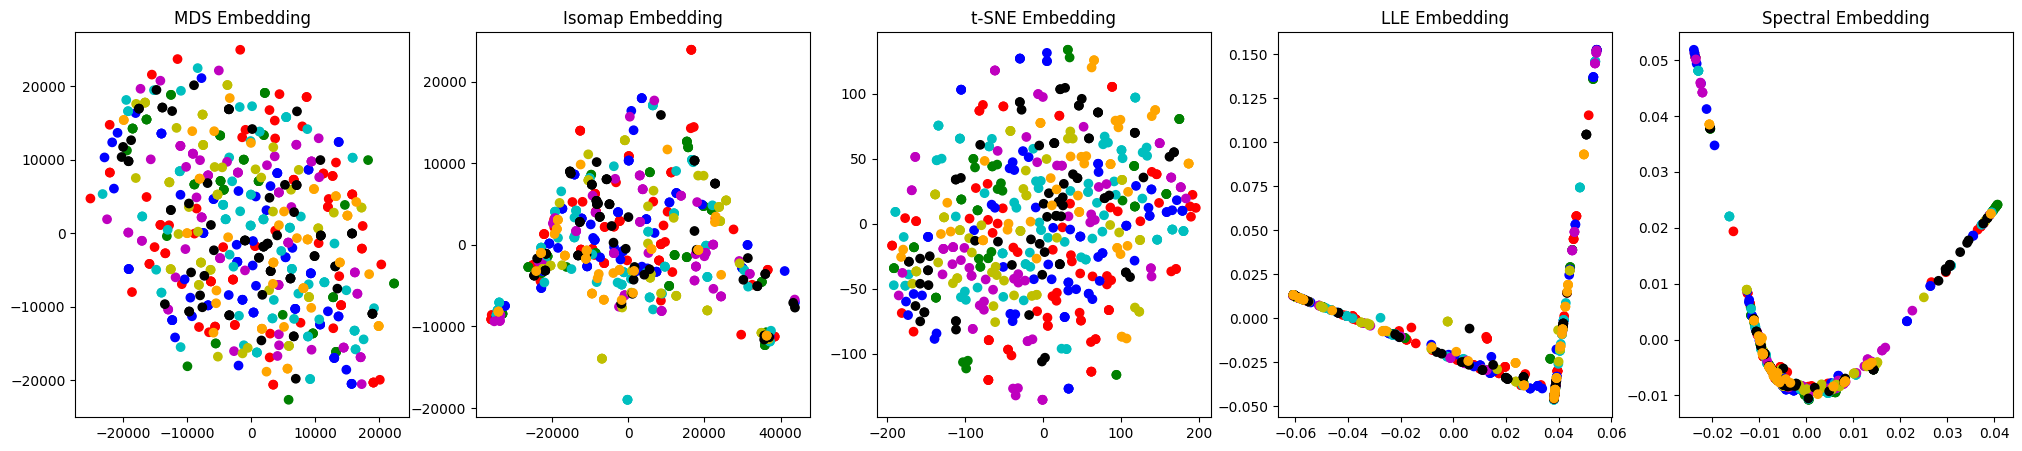

In [19]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

# MDS
axs[0].scatter(train_transformed[:, 0], train_transformed[:, 1], c=colors)
axs[0].set_title('MDS Embedding')

# Isomap
axs[1].scatter(transformed_isomap_data[:, 0], transformed_isomap_data[:, 1], c=colors)
axs[1].set_title('Isomap Embedding')

# t-SNE
axs[2].scatter(transformed_tsne_data[:, 0], transformed_tsne_data[:, 1], c=colors)
axs[2].set_title('t-SNE Embedding')

# LLE
axs[3].scatter(transformed_lle_data[:, 0], transformed_lle_data[:, 1], c=colors)
axs[3].set_title('LLE Embedding')

# Spectral
axs[4].scatter(transformed_spectral_data[:, 0], transformed_spectral_data[:, 1], c=colors)
axs[4].set_title('Spectral Embedding')


plt.show()